In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

from sklearn.model_selection import train_test_split

from torch.utils.data import TensorDataset, DataLoader

/home/vlad/miniconda3/envs/yolov8/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


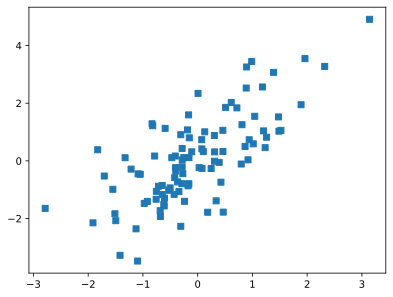

In [18]:
N = 100
x = torch.randn(N, 1)
y_orig = x + torch.randn(N, 1)

plt.plot(x,y_orig, 's')
plt.show()

In [19]:
train_size=.8

X_train, X_test, y_train, y_test = train_test_split(x,y_orig,train_size=train_size)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size = len(y_test), shuffle=True)

In [20]:
ANNreg = nn.Sequential(
    nn.Linear(1,1),
    nn.ReLU(),
    nn.Linear(1,1)
)

In [21]:
learning_rate = .05
lossfun = nn.MSELoss()

optimizer = torch.optim.SGD(ANNreg.parameters(), lr=learning_rate)

In [22]:
numepochs = 500

train_losses = []
test_losses = []

for epochi in range(numepochs):
    
    train_batch_loss = []
    
    for X,y in train_loader:
        yHat = ANNreg(X)

        loss = lossfun(yHat, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_batch_loss.append(loss.detach())
    
    X_test, y_test = next(iter(test_loader))
    pred_test = ANNreg(X_test)
    test_losses.append((pred_test.detach()-y_test).pow(2).mean())
    train_losses.append(np.mean(train_batch_loss))

In [23]:

test_loss = test_losses[-1]

print(f"Final TRAIN loss: {loss.detach()}")
print(f"Final TEST loss: {test_loss.detach()}")

Final TRAIN loss: 0.2316684126853943
Final TEST loss: 1.7791807651519775


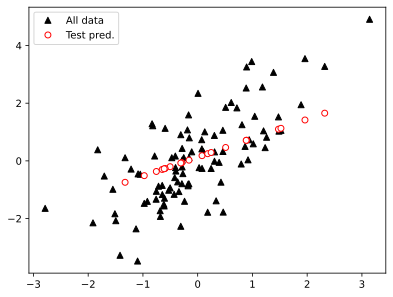

In [24]:
# pred_train = ANNreg(x[train_bool]).detach().numpy()

plt.plot(x,y_orig, 'k^', label='All data')
# plt.plot(x[train_bool], pred_train, 'bs', markerfacecolor='w', label='Training pred.')
plt.plot(X_test, pred_test.detach(), 'ro', markerfacecolor='w', label='Test pred.')
plt.legend()
plt.show()

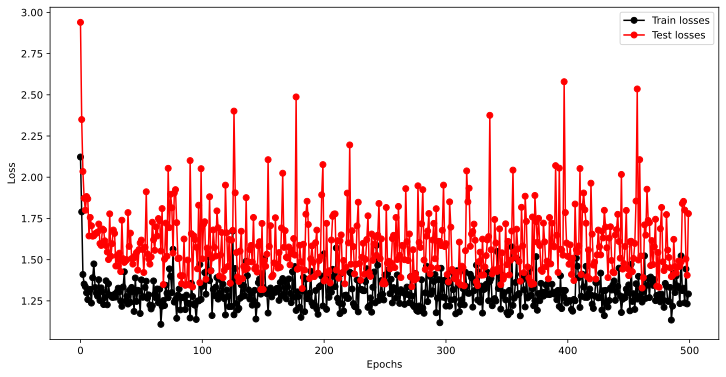

In [25]:
fig= plt.figure(figsize=(12,6))
plt.plot(train_losses, 'ko-', label='Train losses')
plt.plot(test_losses, 'ro-', label='Test losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()